In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import csv

%matplotlib inline

In [2]:
!ls

Datasets
ML_Project_KM.ipynb
README.MD
Wenchang_Qian_Kaggle_Ames_Iowa_Housing_Price_Prediction.ipynb
james_proj3.ipynb


In [3]:
house_train = pd.read_csv('Datasets/train.csv');
print('Training Data:', house_train.shape);
house_test = pd.read_csv('Datasets/test.csv');
print('Test Data:', house_test.shape);

Training Data: (1460, 81)
Test Data: (1459, 80)


In [4]:
house_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


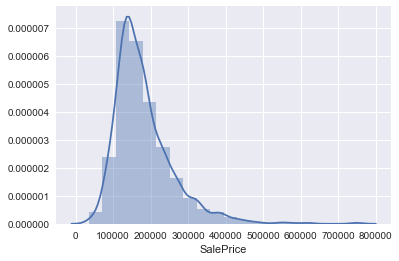

In [5]:
# Distribution of house sales price
sns.distplot(house_train.SalePrice, bins = 20)

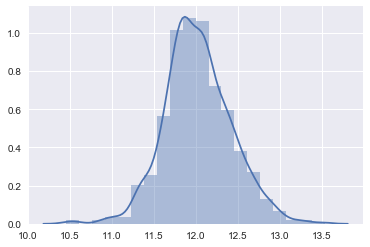

In [6]:
# Distribution of log(Price)
sns.distplot([np.log(house_train.SalePrice + 1)], bins = 20)

In [7]:
# Going to plot correlation between fields of numeric values
house_train_numeric = house_train[\
    house_train.select_dtypes(include=['float64','int64']).columns.values];
corr_train = house_train_numeric.corr();

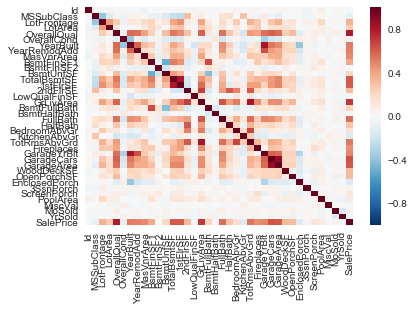

In [8]:
sns.heatmap(corr_train)
sns.set(font_scale = .35)

In [9]:
sns.set(style="ticks", color_codes=True)

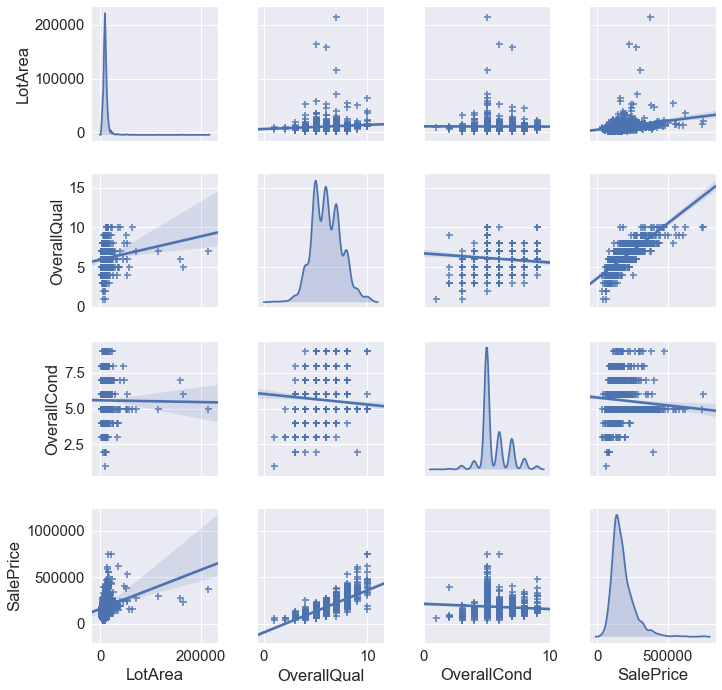

In [12]:
# scatter plot of various features

# It taxes the computer very much to do the plot.
# Here I only plotted scatter plot between FOUR numeric features
# We can add more features if we want later on

sns.pairplot(house_train_numeric[['LotArea',\
                                  'OverallQual',\
                                  'OverallCond',\
                                  'SalePrice']],\
             diag_kind='kde', kind = 'reg',\
             markers='+', diag_kws=dict(shade=True));
sns.set(font_scale = 1.5)

In [14]:
# Zero bedroom or zero garage parking spaces or zero bathroom may give trouble
# to derived features such as bath/bed
# Need to think about a way to walk around this

print('Num of houses with Zero Bedroom:', sum(house_train.BedroomAbvGr==0))
print('Num of houses with Zero Garage Parking:', sum(house_train.GarageCars==0))
print('Num of houses with Zero Full Bath:', sum(house_train.FullBath==0))
print('Num of houses with Zero Half Bath:', sum(house_train.HalfBath==0))
print('Num of houses with Neither Half Nor Full Bath:', sum((house_train.HalfBath==0) & (house_train.FullBath==0)))

Num of houses with Zero Bedroom: 6
Num of houses with Zero Garage Parking: 81
Num of houses with Zero Full Bath: 9
Num of houses with Zero Half Bath: 913
Num of houses with Neither Half Nor Full Bath: 3
